In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
#%matplotlib inline

# use matplotlib's interactive mode
from importlib import reload
reload(plt)
%matplotlib notebook
%matplotlib notebook

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 3ABC-1A68

 Directory of C:\Users\student\Desktop\ENGR231-2020Q2

05/07/2020  10:29 AM    <DIR>          .
05/07/2020  10:29 AM    <DIR>          ..
05/07/2020  08:54 AM    <DIR>          .cph_tmp8kahran9
05/07/2020  08:50 AM             2,237 .gitignore
05/07/2020  09:47 AM    <DIR>          .ipynb_checkpoints
05/07/2020  08:50 AM            36,864 Al60601_raw_data.xls
05/07/2020  08:50 AM            72,099 ENGR231_Lab2.ipynb
05/07/2020  09:37 AM             2,898 environment.yml
05/07/2020  08:50 AM            37,983 Lab_6_outline_slides.pptx
05/07/2020  10:29 AM           436,772 lab6.ipynb
05/07/2020  08:50 AM            35,149 LICENSE
05/07/2020  08:50 AM                71 README.md
05/07/2020  08:50 AM            39,424 Steel1018_raw_data.xls
05/07/2020  08:50 AM           107,483 stress-strain_curve.png
              10 File(s)        770,980 bytes
               4 Dir(s)  117,045,993,472 bytes free


In [3]:
df_al = pd.read_excel('Al60601_raw_data.xls')
df_al.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [4]:
df_steel = pd.read_excel('Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


In [5]:
d = 0.506
r = d/2
A = np.pi*r**2

stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

<IPython.core.display.Javascript object>


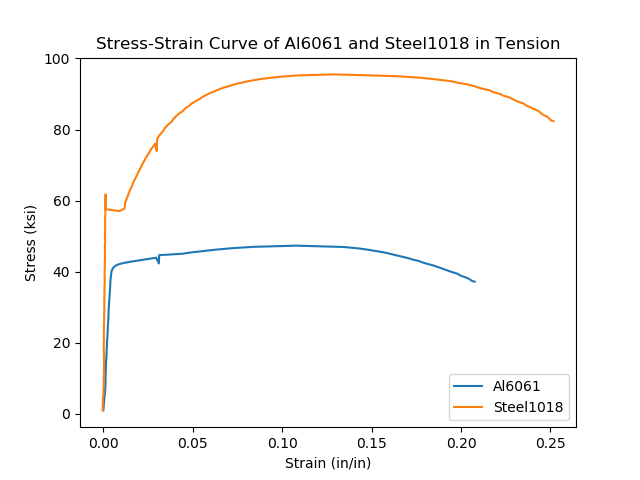

In [6]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])
#plt.savefig('stress-strain_curve.png', dpi=300)
plt.show()

In [7]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
ts_steel = np.max(stress_steel)
print(f'The tensile strength of Al6061 is: {round(ts_al,1)} ksi')
print(f'The tensile strength of Steel1018 is: {round(ts_steel,1)} ksi')

The tensile strength of Al6061 is: 47.3 ksi
The tensile strength of Steel1018 is: 95.5 ksi


In [8]:
# Find the elastic modulus of Al6061
# use stress and strain values from stress=0 to stress=35 ksi
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]
linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]
print(f'The elastic modulus of Al6061 is {round(E_al,1)} ksi')

The elastic modulus of Al6061 is 9909.4 ksi


In [9]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 ksi
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]
linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]
print(f'The elastic modulus of Steel1018 is {round(E_steel,1)} ksi')


The elastic modulus of Steel1018 is 40125.4 ksi


The ductility of a metal is calculated from a stress strain curve by drawing a line down from the fracture point on the curve, parallel to the linear elastic region. Where that line crosses the strain axis is the ductility.

Point-Slope Formula for a line:

$$ y - y_1 = m(x-x_1) $$

Where $m=$ slope in the linear elastic region (elastic modulus), $x_1=$ last strain point on the stress strain curve, $y_1 =$ last stress point on the stress strain curve.

Solve the equation above for $x$, when $y=0$ in terms of $x_1$, $x_2$ and $m$.

$$ x = \frac{-y_1}{m}+x_1 $$

Substitue in ductility, elastic modulus $E$, and the last stress and strain points.

$$ \%EL = \frac{-stress_{last}}{E}+strain_{last} $$

In [10]:
# Find the ductility for Al6061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/E_al + strain_al_last
print(f'The ductility of Al6061 is {round(EL_al*100,1)}%')

The ductility of Al6061 is 20.4%


In [11]:
# Find the ductility of Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/E_steel + strain_steel_last
print(f'The ductility of Steel1018 is {round(EL_steel*100,1)}%')

The ductility of Steel1018 is 25.0%


The yield strength of a metal is calculated from a stress strain curve by drawing a line parallel to the elastic modulus that goes through the point strain=0.002. Where that line crosses the stress strain curve, that amount of stress is the yield strength

Point-Slope Formula for a line:

$$ y - y_1 = m(x-x_1) $$

Where $m=$ slope in the linear elastic region (elastic modulus, E), $x_1=0.002$, and $y_1 = 0$

Rewrite the equation, where $y=stress_{offset}$ and the elastic modulus and value of $x_1$ and $y_1$ are included.

$$ stress_{offset} = E(strain-0.002) $$

<IPython.core.display.Javascript object>


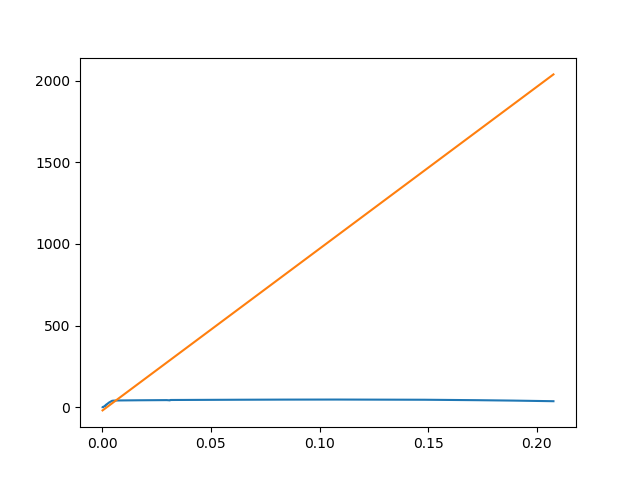

In [13]:
# calculate the yield strength of Al6061
stress_offset_al = E_al*(strain_al_array-0.002)
plt.plot(strain_al,stress_al,strain_al,stress_offset_al)
plt.show()

In [14]:
YS_al = 41.3653 # by zooming into the plot that contains the stress strain curve of Al6061 and the offset stress
print(f'The yield strength of Al6061 is {round(YS_al,1)} ksi')

The yield strength of Al6061 is 41.4 ksi


<IPython.core.display.Javascript object>


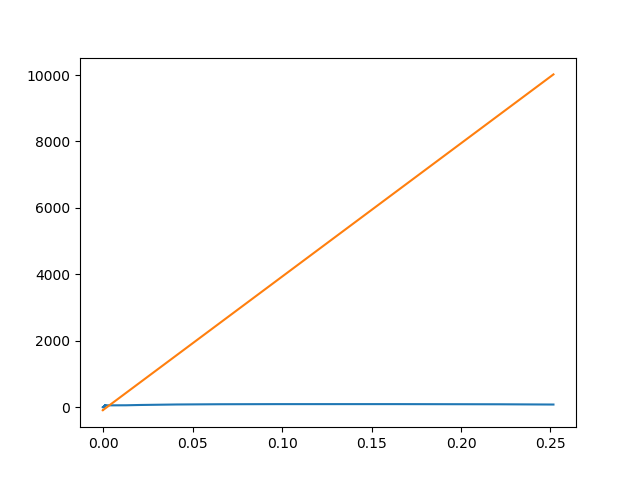

In [15]:
# Calculate the yield strength of Steel1018
stress_offset_steel = E_steel*(strain_steel_array-0.002)
plt.plot(strain_steel,stress_steel,strain_steel,stress_offset_steel)
plt.show()

In [16]:
YS_steel = 57.4495 # by zooming into a plot showing the stress strain curve of steel1018 and the offset stress
print(f'the yield strength of steel1018 is {round(YS_steel,1)} ksi')

the yield strength of steel1018 is 57.4 ksi


<IPython.core.display.Javascript object>


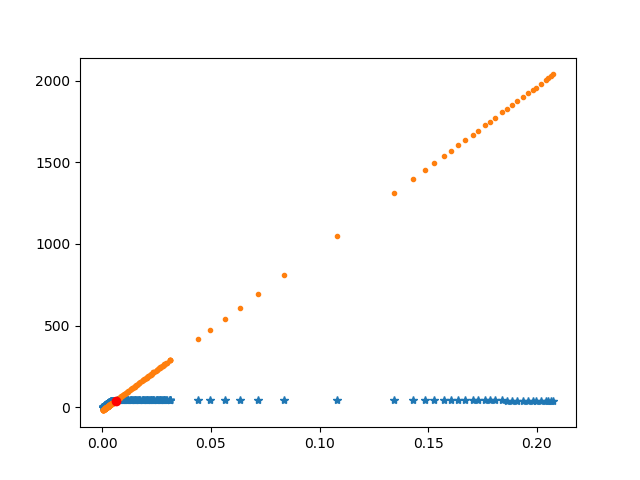

In [17]:
# Bonus: Calculate Yield Strength of Al6061 Programatically

x = strain_al_array
f = np.array(stress_al)
g = stress_offset_al

plt.plot(strain_al_array, f, '*')
plt.plot(strain_al_array, g, '.')

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(strain_al_array[idx], f[idx], 'ro')

plt.show()

In [18]:
print(f'The yield strength of Al6061 is {round(f[idx][0],1)} ksi')

The yield strength of Al6061 is 41.3 ksi


<IPython.core.display.Javascript object>


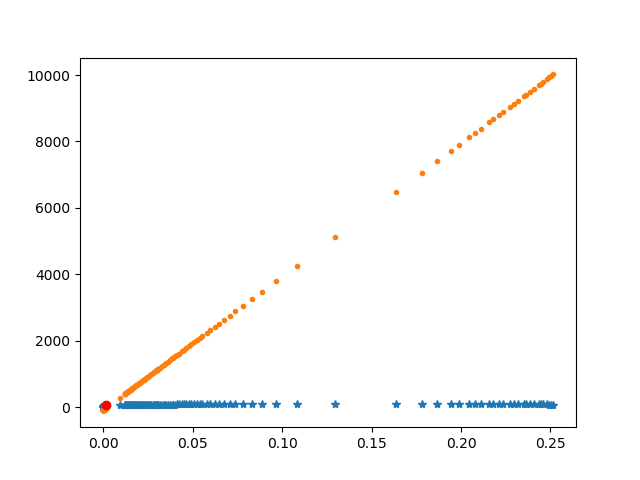

In [19]:
# Bonus: Calculate Yield Strength of Steel1018 Programatically

x = strain_steel_array
f = np.array(stress_steel)
g = stress_offset_steel

plt.plot(x, f, '*')
plt.plot(x, g, '.')

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'ro')

plt.show()

In [20]:
print(f'The yield strength of Steel1018 is {round(f[idx][0],1)} ksi')

The yield strength of Steel1018 is 57.6 ksi


In [21]:
def intersection_point(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    """ a function to calculate the intersection point of two defined points. Returns a tuple or None """
    d = (By2 - By1) * (Ax2 - Ax1) - (Bx2 - Bx1) * (Ay2 - Ay1)
    if d:
        uA = ((Bx2 - Bx1) * (Ay1 - By1) - (By2 - By1) * (Ax1 - Bx1)) / d
        uB = ((Ax2 - Ax1) * (Ay1 - By1) - (Ay2 - Ay1) * (Ax1 - Bx1)) / d
    else:
        return
    if not(0 <= uA <= 1 and 0 <= uB <= 1):
        return
    x = Ax1 + uA * (Ax2 - Ax1)
    y = Ay1 + uA * (Ay2 - Ay1)
 
    return x, y

<IPython.core.display.Javascript object>


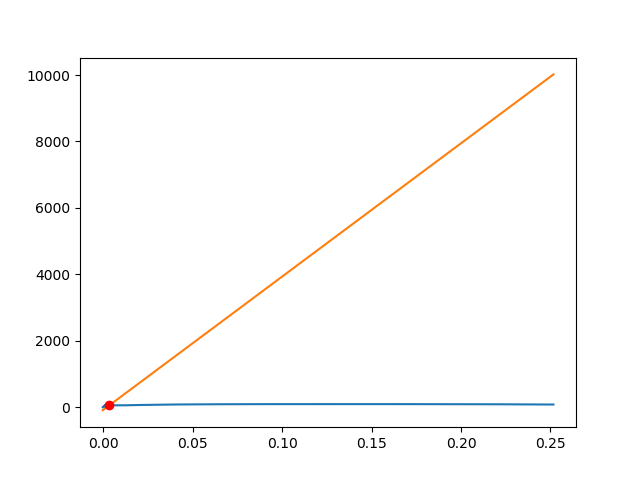

In [22]:
first = idx[0]
second = idx[0]+1
Ax1 = strain_steel_array[first]
Ay1 = stress_steel[first]
Ax2 = strain_steel_array[second]
Ay2 = stress_steel[second]
Bx1 = strain_steel_array[first]
By1 = stress_offset_steel[first]
Bx2 = strain_steel_array[second]
By2 = stress_offset_steel[second]
x,y = intersection_point(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2)
plt.plot(strain_steel,stress_steel_array)
plt.plot(strain_steel,stress_offset_steel)
plt.plot(x,y,'ro')
plt.show()

In [23]:
print(f'The yield strength of steel1018 is {round(y,1)} ksi')

The yield strength of steel1018 is 57.4 ksi
